# Load Data and general visualization

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import re
import string
from gensim.models import Word2Vec
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk import ngrams
from collections import Counter
import nltk

In [21]:
sns.set_theme()

In [22]:
raw = pd.read_csv('./data/alldata.csv')

In [23]:
raw.head()

,position,company,description,reviews,location
0,Development Director,ALS TDI,Development Director\nALS Therapy Development ...,NaN,"Atlanta, GA 30301"
1,An Ostentatiously-Excitable Principal Research...,The Hexagon Lavish,"Job Description\n\n""The road that leads to acc...",NaN,"Atlanta, GA"
2,Data Scientist,Xpert Staffing,"Growing company located in the Atlanta, GA are...",NaN,"Atlanta, GA"
3,Data Analyst,Operation HOPE,DEPARTMENT: Program OperationsPOSITION LOCATIO...,44.0,"Atlanta, GA 30303"
4,Assistant Professor -TT - Signal Processing & ...,Emory University,DESCRIPTION\nThe Emory University Department o...,550.0,"Atlanta, GA"


In [24]:
raw.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6964 entries, 0 to 6963
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   position     6953 non-null   object 
 1   company      6953 non-null   object 
 2   description  6953 non-null   object 
 3   reviews      5326 non-null   float64
 4   location     6953 non-null   object 
dtypes: float64(1), object(4)
memory usage: 47.8 MB


In [25]:
raw['reviews'].describe()

count      5326.000000
mean       3179.089185
std        8448.515056
min           2.000000
25%          27.000000
50%         230.000000
75%        1578.000000
max      148114.000000
Name: reviews, dtype: float64

In [26]:
cols = list(raw.columns)
cols.remove('reviews')
raw[cols].describe()

,position,company,description,location
count,6953,6953,6953,6953
unique,5242,2213,6708,382
top,Data Scientist,Amazon.com,Note: By applying to this position your applic...,"Seattle, WA"
freq,351,358,9,563


# General Clean Data

In [27]:
raw.isnull().sum()

position         11
company          11
description      11
reviews        1638
location         11
dtype: int64

In [28]:
data = raw.copy()
data.dropna(subset=['position'], inplace=True)
data.isnull().sum()

position          0
company           0
description       0
reviews        1627
location          0
dtype: int64

In [29]:
foo = lambda name: ''.join(i.rstrip() for i in str(name) if not i.isdigit())
data['location'] = data['location'].apply(foo)

In [30]:
def clean_position(text):
    text = text.lower()
    text = re.sub('[%s]' % re.escape(string.punctuation), ' ', text)
    text = ' '.join(text.split())
    return text
# string.punctuation

In [31]:
data['position'] = data['position'].apply(clean_position)

In [32]:
# extra_stopwords = ['data','experience','work','job', 'team','will','skill','year','skills','s', 'S']

def clean_description(sentence):
    tokens = word_tokenize(sentence)
    tokens = [t.lower() for t in tokens]
    tokens = [t for t in tokens if t.isalnum()]
    tokens = [t for t in tokens if t != '\n']
    # tokens = [t for t in tokens if t not in stopwords.words('english')]
    # tokens = [t for t in tokens if t not in extra_stopwords]
    # tokens = [lemmer.lemmatize(word) for word in tokens]
    sentence = ' '.join(tokens)
    return sentence

def clean_description2(sentence):
    tokens = word_tokenize(sentence)
    tokens = [t for t in tokens if t.isalnum()]
    tokens = [t for t in tokens if t != '\n']
    sentence = ' '.join(tokens)
    return sentence

def clean_description3(sentence):
    tokens = word_tokenize(sentence)
    tokens = [t for t in tokens if t.isalnum()]
    tokens = [t for t in tokens if t != '\n']
    doc = nlp(' '.join(tokens))
    doc = ' '.join([token.lemma_ for token in doc])
    return doc

# Feature Engineering

In [33]:
data['state'] = data['location'].apply(lambda x: x.split(',')[1])

In [34]:
data

,position,company,description,reviews,location,state
0,development director,ALS TDI,Development Director\nALS Therapy Development ...,NaN,"Atlanta,GA",GA
1,an ostentatiously excitable principal research...,The Hexagon Lavish,"Job Description\n\n""The road that leads to acc...",NaN,"Atlanta,GA",GA
2,data scientist,Xpert Staffing,"Growing company located in the Atlanta, GA are...",NaN,"Atlanta,GA",GA
3,data analyst,Operation HOPE,DEPARTMENT: Program OperationsPOSITION LOCATIO...,44.0,"Atlanta,GA",GA
4,assistant professor tt signal processing machi...,Emory University,DESCRIPTION\nThe Emory University Department o...,550.0,"Atlanta,GA",GA
...,...,...,...,...,...,...
6959,data developer machine learning analyst,NetApp,Are you data-driven? We at NetApp believe in t...,574.0,"Sunnyvale,CA",CA
6960,scientist i,"Pharmacyclics, an Abbvie Company",Pharmacyclics is committed to the development ...,26.0,"Sunnyvale,CA",CA
6961,intern scientist,Oath Inc,"Oath, a subsidiary of Verizon, is a values-led...",5.0,"Sunnyvale,CA",CA
6962,senior data applied scientist,Microsoft,We are the Bing Core Relevance team responsibl...,4618.0,"Sunnyvale,CA",CA


In [35]:
data[['location', 'state']].describe()

,location,state
count,6953,6953
unique,92,10
top,"NewYork,NY",CA
freq,848,2152


In [36]:
data[['location', 'state']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6953 entries, 0 to 6963
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   location  6953 non-null   object
 1   state     6953 non-null   object
dtypes: object(2)
memory usage: 163.0+ KB


# Position field analysis

In [37]:
def word_frequency(sentence):
    sentence = " ".join(sentence)
    
    new_tokens = word_tokenize(sentence)
    new_tokens = [t.lower() for t in new_tokens]
    new_tokens = [t for t in new_tokens if t not in stopwords.words('english')]
    new_tokens = [t for t in new_tokens if t.isalpha()]
    lemmatizer = WordNetLemmatizer()
    new_tokens = [lemmatizer.lemmatize(t) for t in new_tokens]
    
    counted_list = [Counter(ngrams(new_tokens, x)) for x in [1,2,3]]
    col_names = ['word', 'pairs', 'trigrams']
    df_list = []
    for counted, name in zip(counted_list, col_names):
        df = pd.DataFrame(counted.items(), columns=[name,'frequency'])
        df.sort_values(by='frequency',ascending=False,inplace=True)
        df_list.append(df)
        
    word_freq = df_list[0] 
    word_pairs = df_list[1]
    trigrams = df_list[2]
    
    return word_freq, word_pairs, trigrams

In [39]:
data2, data3, data4 = word_frequency([str(x) for x in list(data['position'])])

<AxesSubplot:xlabel='frequency', ylabel='trigrams'>

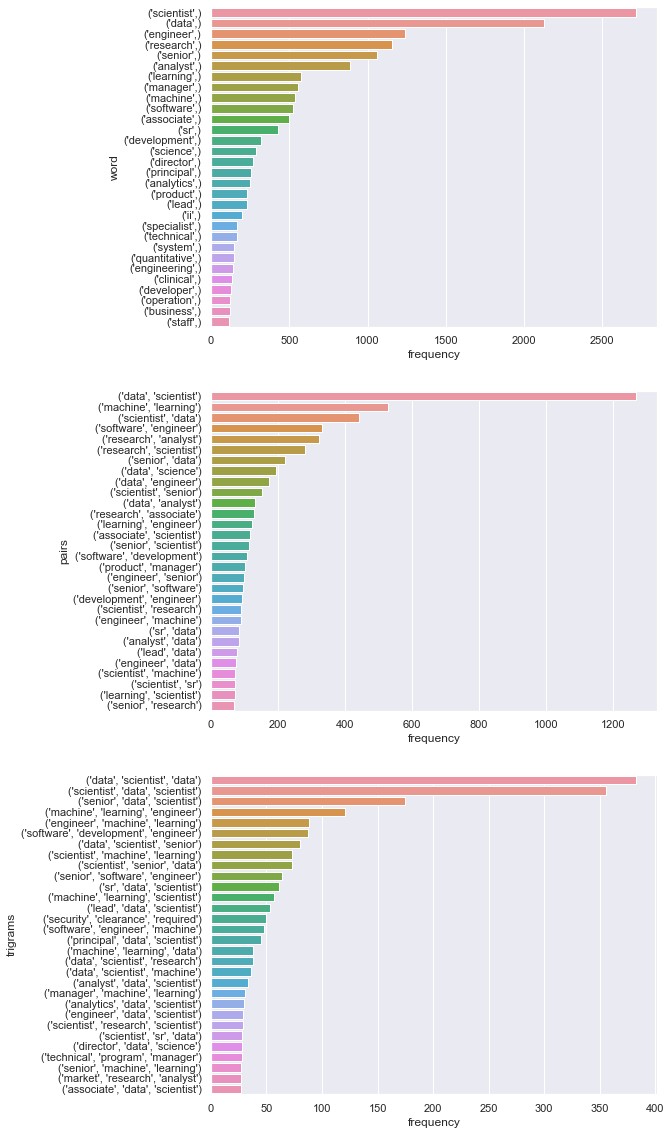

In [40]:
# create subplot of the different data frames
fig, axes = plt.subplots(3,1,figsize=(8,20))
sns.barplot(ax=axes[0],x='frequency',y='word',data=data2.head(30))
sns.barplot(ax=axes[1],x='frequency',y='pairs',data=data3.head(30))
sns.barplot(ax=axes[2],x='frequency',y='trigrams',data=data4.head(30))

## Data Scientist positions

In [42]:
data_sci = data[data['position'].apply(lambda x: 'data scientist' in str(x).lower())].copy()
data_sci = data_sci['position'].apply(lambda x: str(x).lower().replace('data scientist', ''))
data2, data3, data4 = word_frequency([str(x) for x in list(data_sci)])

<AxesSubplot:xlabel='frequency', ylabel='trigrams'>

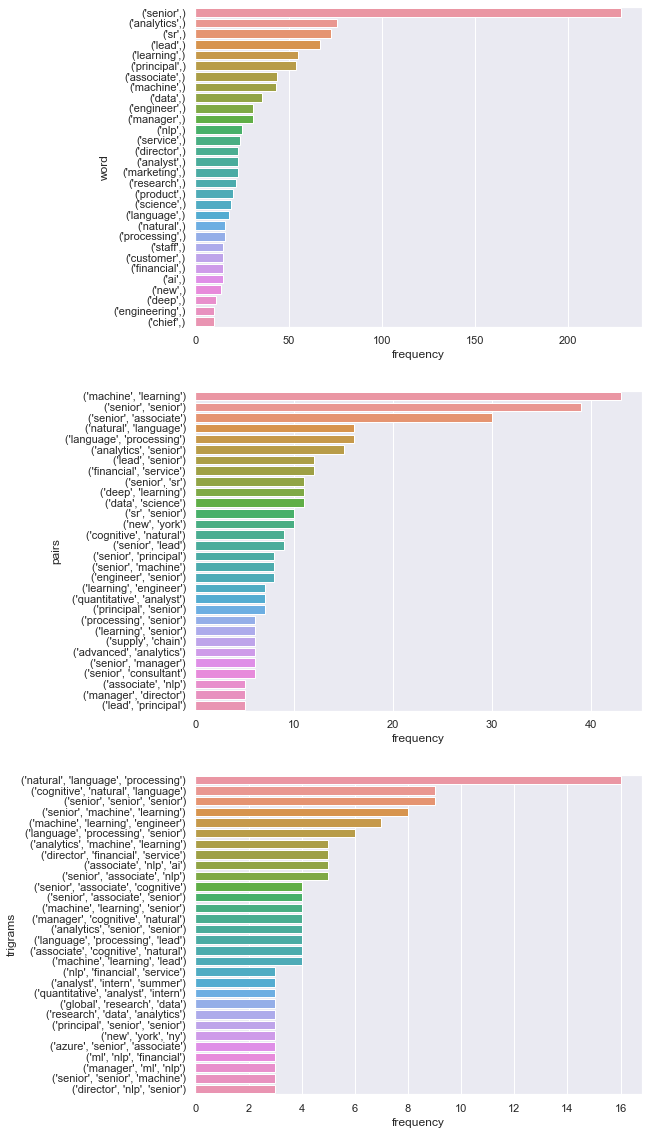

In [43]:
fig, axes = plt.subplots(3,1,figsize=(8,20))
sns.barplot(ax=axes[0],x='frequency',y='word',data=data2.head(30))
sns.barplot(ax=axes[1],x='frequency',y='pairs',data=data3.head(30))
sns.barplot(ax=axes[2],x='frequency',y='trigrams',data=data4.head(30))

## Separate positions into categories using gensim

In [44]:
# data2 = data.copy()
data['position category'] = data['position']

pos_dict = {
    'data_scientist':[
        'scientist', 'data science'
    ],
    
    'data_engineer':[
        'data engineer', 'data architect', 'database administrator', 'data pipeline', 'data management specialist'
    ],
    
    'machine_learning_eng':[
        'engineer', 'machine learning', 'principal statistical programmer','programmer', 'developer'
    ],
    
    'data_analyst':[
        'analyst', 'analytics', 'statistician', 'statistics', 'biostatistics', 'data analytics',
        'data analysis', 'data visualization specialist', 'data visualization'
    ],
    
    'data_sci_manager':[
        'manager', 'consultant', 'director'
    ]
}

cat_list = ['Data Scientist', 'Data Engineer', 'Machine Learning Engineer',
            'Data Analyst', 'Data Science Manager']

for pos_list, position_category in zip(pos_dict.values(), cat_list):
    for el in pos_list:
        idxs = data['position category'].str.contains(el)
        data.loc[idxs, 'position category'] = position_category
        

idxs = ~data['position category'].str.contains('|'.join(cat_list))
data.loc[idxs, 'position category'] = 'Others'

In [45]:
data

,position,company,description,reviews,location,state,position category
0,development director,ALS TDI,Development Director\nALS Therapy Development ...,NaN,"Atlanta,GA",GA,Data Science Manager
1,an ostentatiously excitable principal research...,The Hexagon Lavish,"Job Description\n\n""The road that leads to acc...",NaN,"Atlanta,GA",GA,Data Scientist
2,data scientist,Xpert Staffing,"Growing company located in the Atlanta, GA are...",NaN,"Atlanta,GA",GA,Data Scientist
3,data analyst,Operation HOPE,DEPARTMENT: Program OperationsPOSITION LOCATIO...,44.0,"Atlanta,GA",GA,Data Analyst
4,assistant professor tt signal processing machi...,Emory University,DESCRIPTION\nThe Emory University Department o...,550.0,"Atlanta,GA",GA,Machine Learning Engineer
...,...,...,...,...,...,...,...
6959,data developer machine learning analyst,NetApp,Are you data-driven? We at NetApp believe in t...,574.0,"Sunnyvale,CA",CA,Machine Learning Engineer
6960,scientist i,"Pharmacyclics, an Abbvie Company",Pharmacyclics is committed to the development ...,26.0,"Sunnyvale,CA",CA,Data Scientist
6961,intern scientist,Oath Inc,"Oath, a subsidiary of Verizon, is a values-led...",5.0,"Sunnyvale,CA",CA,Data Scientist
6962,senior data applied scientist,Microsoft,We are the Bing Core Relevance team responsibl...,4618.0,"Sunnyvale,CA",CA,Data Scientist


<AxesSubplot:>

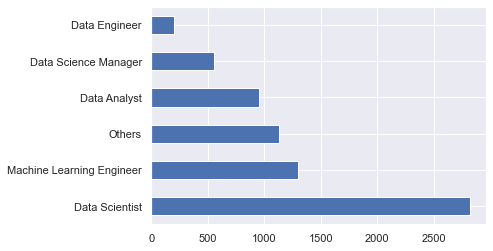

In [46]:
data['position category'].value_counts().plot(kind='barh')

In [47]:
c_table = pd.crosstab(data['state'], data['position category'])
c_table

position category,Data Analyst,Data Engineer,Data Science Manager,Data Scientist,Machine Learning Engineer,Others
state,,,,,,
CA,213,70,126,1060,406,277
CO,8,3,10,24,138,68
DC,125,5,22,93,44,51
GA,47,11,17,108,46,40
IL,112,18,51,142,75,73
MA,129,23,137,563,205,266
NJ,3,1,0,53,3,8
NY,222,35,24,415,63,167
TX,29,2,15,95,44,33


In [56]:
c_table = pd.crosstab(data['state'], data['position category'], normalize='index')
c_table*100

position category,Data Analyst,Data Engineer,Data Science Manager,Data Scientist,Machine Learning Engineer,Others
state,,,,,,
CA,9.897770,3.252788,5.855019,49.256506,18.866171,12.871747
CO,3.187251,1.195219,3.984064,9.561753,54.980080,27.091633
DC,36.764706,1.470588,6.470588,27.352941,12.941176,15.000000
GA,17.472119,4.089219,6.319703,40.148699,17.100372,14.869888
IL,23.779193,3.821656,10.828025,30.148620,15.923567,15.498938
MA,9.750567,1.738473,10.355253,42.554800,15.495087,20.105820
NJ,4.411765,1.470588,0.000000,77.941176,4.411765,11.764706
NY,23.974082,3.779698,2.591793,44.816415,6.803456,18.034557
TX,13.302752,0.917431,6.880734,43.577982,20.183486,15.137615


In [64]:
c_table.apply(lambda x: x/c_table['Data Scientist'])

position category,Data Analyst,Data Engineer,Data Science Manager,Data Scientist,Machine Learning Engineer,Others
state,,,,,,
CA,0.200943,0.066038,0.118868,1.0,0.383019,0.261321
CO,0.333333,0.125000,0.416667,1.0,5.750000,2.833333
DC,1.344086,0.053763,0.236559,1.0,0.473118,0.548387
GA,0.435185,0.101852,0.157407,1.0,0.425926,0.370370
IL,0.788732,0.126761,0.359155,1.0,0.528169,0.514085
MA,0.229130,0.040853,0.243339,1.0,0.364121,0.472469
NJ,0.056604,0.018868,0.000000,1.0,0.056604,0.150943
NY,0.534940,0.084337,0.057831,1.0,0.151807,0.402410
TX,0.305263,0.021053,0.157895,1.0,0.463158,0.347368


In [66]:
c_table.apply(lambda x: x/c_table['Data Scientist']).loc[['GA','TX']]

position category,Data Analyst,Data Engineer,Data Science Manager,Data Scientist,Machine Learning Engineer,Others
state,,,,,,
GA,0.435185,0.101852,0.157407,1.0,0.425926,0.370370
TX,0.305263,0.021053,0.157895,1.0,0.463158,0.347368


In [19]:
for col in c_table.columns:
    print(col)

Data Analyst
Data Engineer
Data Science Manager
Data Scientist
Machine Learning Engineer
Others


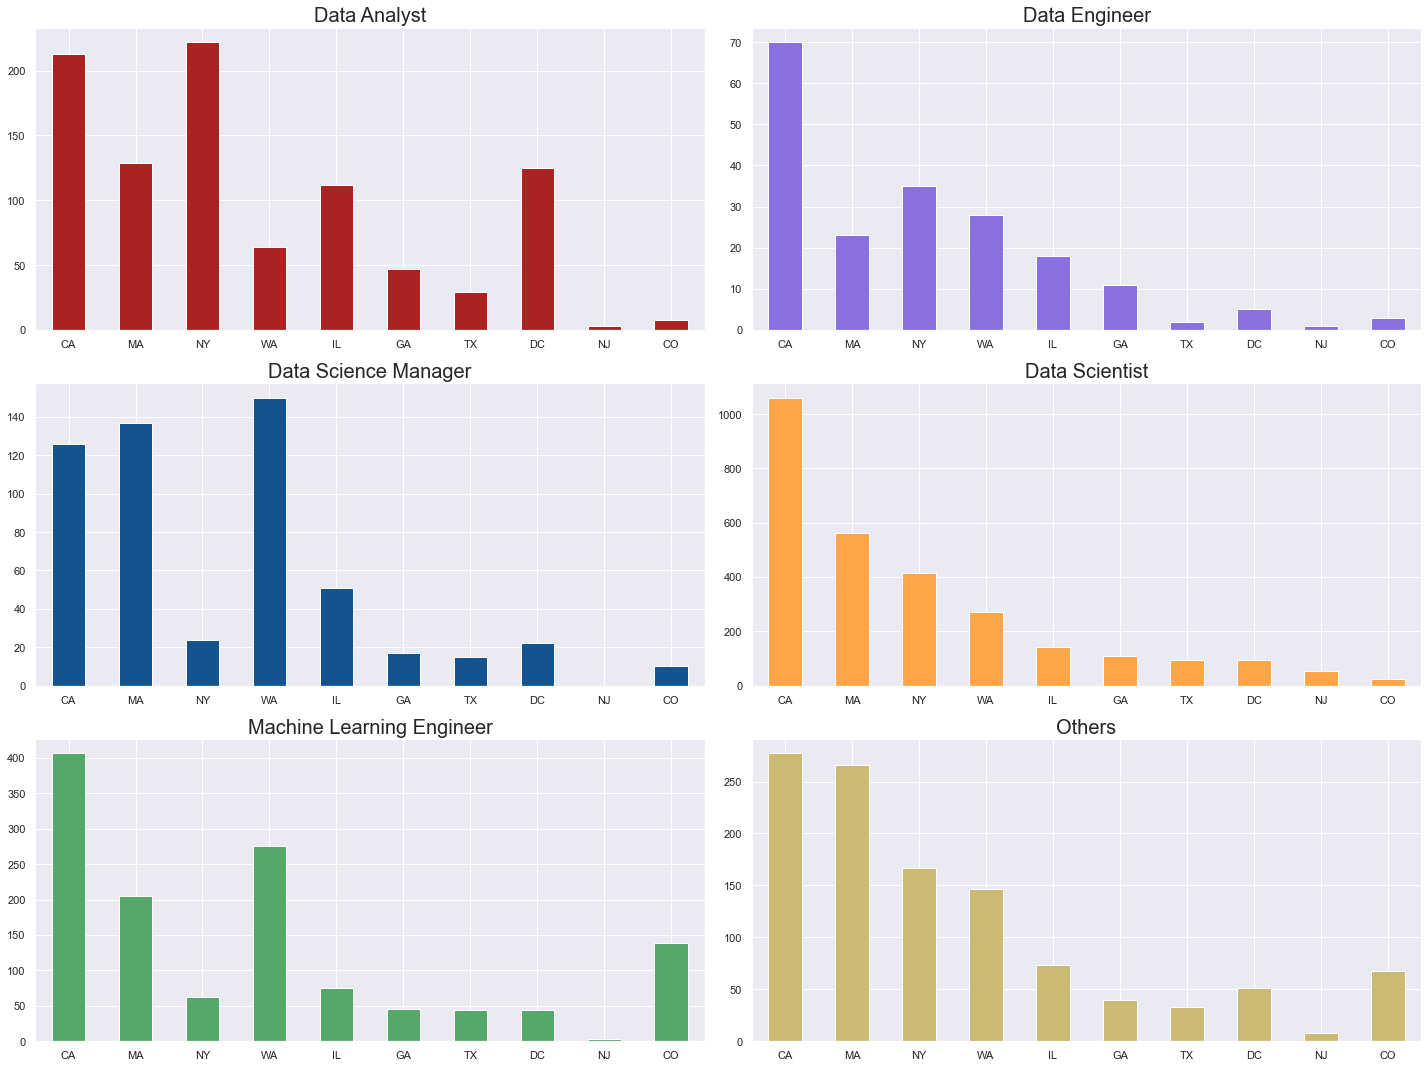

In [20]:
c_table.sort_values(by='Data Scientist', ascending=False, inplace=True)
fig, axs = plt.subplots(3,2, figsize=(20,15))
axs = axs.flatten()

colors = ['#A92420','#8A6FDF','#135390','#FDA649', 'g', 'y']
for col, ax, color in zip(c_table.columns, axs, colors):
    c_table[col].plot(kind='bar', xlabel='', rot=0, color=color, ax=ax)
    ax.set_title(col, size = 20)
plt.tight_layout()

## Word Clouds

In [21]:
# Add words that frequently appear in the descriptions but carry no value to the list of stop words
from wordcloud import WordCloud
from sklearn.feature_extraction import text

In [26]:
lemmer = WordNetLemmatizer()

In [44]:
data2 = data.copy()

In [48]:
data2['description'] = data2['description'].apply(clean_description)

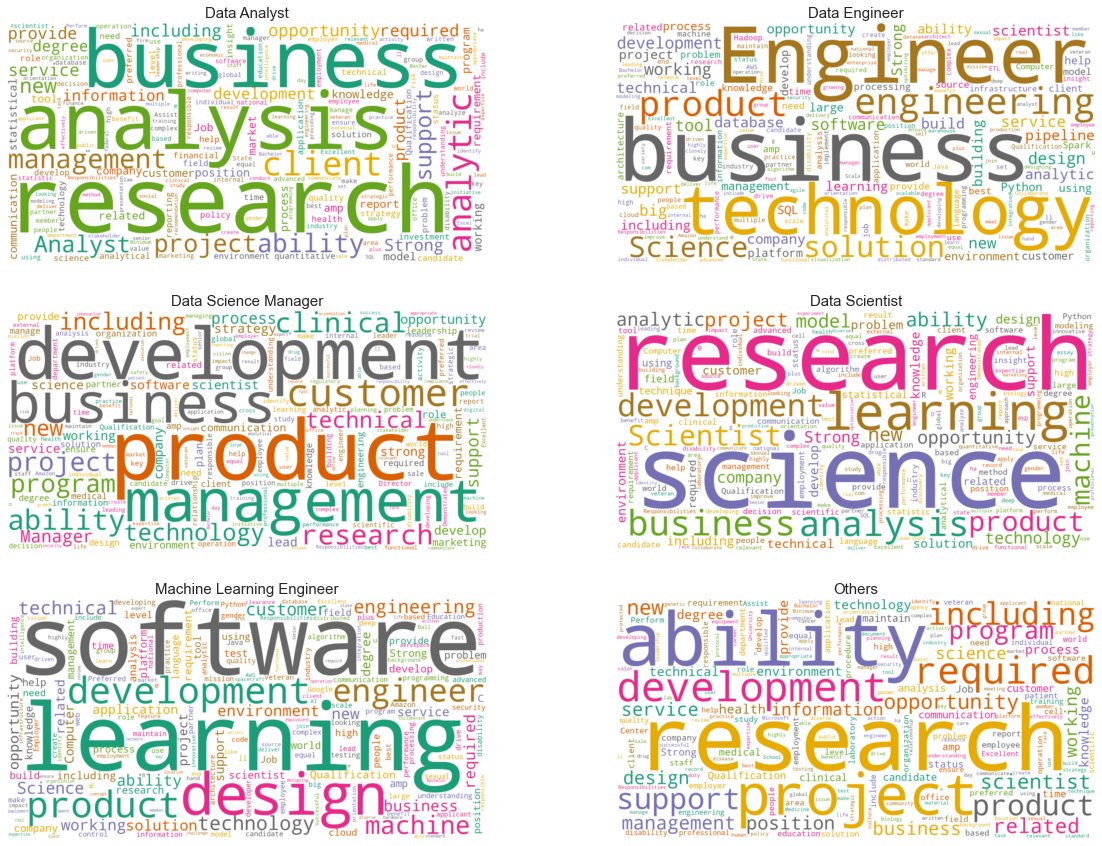

In [55]:
extra_stopword = ['data','experience','work','team','will','skill','year','skills','s', 'S']
stop_words = text.ENGLISH_STOP_WORDS.union(extra_stopword)

# data2.set_index('position category', inplace=True)
data2 = data2.groupby('position category').agg(lambda col: ' '.join(col))

wc = WordCloud(stopwords=stop_words, background_color="white", colormap="Dark2",
             random_state=42, collocations = False, width=1600, height=800)
fig, axs = plt.subplots(3,2, figsize=(20,15))
for x, axs in zip(data2['description'].index, axs.flatten()):
    wc.generate(data2['description'][str(x)])
    axs.imshow(wc, interpolation="bilinear")
    axs.axis("off")
    axs.set_title(str(x), size = 15)
plt.show()

# Company field analysis

In [67]:
print(data['company'].nunique())
print(data['company'].count())

2213
6953


<AxesSubplot:>

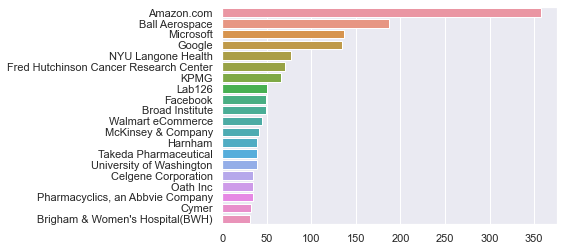

In [16]:
companies = data['company'].value_counts()
top5_companies = companies.head(5)
top20_companies = companies.head(20)
sns.barplot(x=top20_companies.values, y=top20_companies.index)

In [130]:
data2 = data[['company', 'description']].copy()
data2.loc[~data2['company'].isin(top5_companies.index), 'company'] = 'other'
data3 = data2.groupby('company').agg(lambda col: ' '.join(col))
data3['description'] = data3['description'].apply(clean_description)
data3

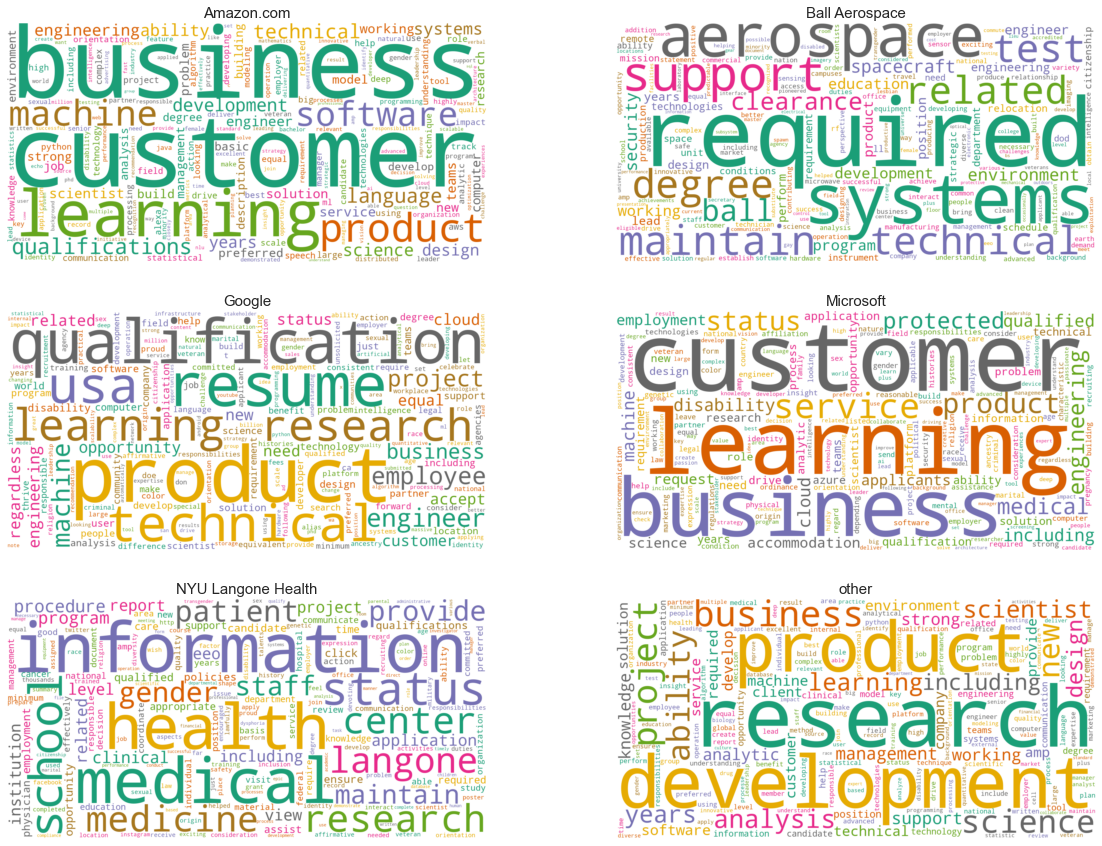

In [128]:
extra_stopword = ['data','experience','work','team','will','skill','year','skills','s', 'S',
                  'amazon', 'google', 'microsoft', 'nyu']
stop_words = text.ENGLISH_STOP_WORDS.union(extra_stopword)

wc = WordCloud(stopwords=stop_words, background_color="white", colormap="Dark2",
             random_state=42, collocations = False, width=1600, height=800)
fig, axs = plt.subplots(3,2, figsize=(20,15))
for x, axs in zip(data3['description'].index, axs.flatten()):
    wc.generate(data3['description'][str(x)])
    axs.imshow(wc, interpolation="bilinear")
    axs.axis("off")
    axs.set_title(str(x), size = 15)
plt.show()

In [17]:
data2 = data[['company', 'position category']].copy()
data2.loc[~data2['company'].isin(top5_companies.index), 'company'] = 'other'

In [18]:
c_table = pd.crosstab(data2['position category'], data2['company'])

<AxesSubplot:ylabel='position category'>

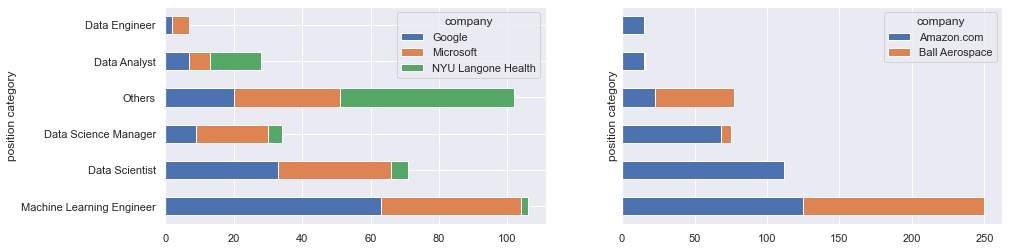

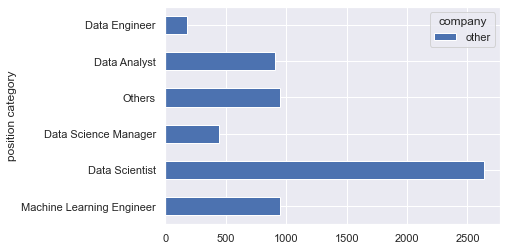

In [62]:
fig, axs = plt.subplots(1,2, figsize=(15,4))
c_table.loc[:, ~c_table.columns.isin(['other', 'Amazon.com', 'Ball Aerospace'])].plot.barh(stacked=True, ax=axs[0])
c_table.loc[:, c_table.columns.isin(['Amazon.com', 'Ball Aerospace'])].plot.barh(stacked=True, ax=axs[1], ylabel= None)
axs[1].axes.get_yaxis().set_ticks([])
c_table.loc[:, c_table.columns.isin(['other'])].plot.barh()
#old one
# c_table.sort_values(by='Amazon.com', ascending=False, inplace=True)
# fig, axs = plt.subplots(3,2, figsize=(20,15))
# axs = axs.flatten()
# colors = ['#A92420','#8A6FDF','#135390','#FDA649', 'g', 'y']
# for col, ax, color in zip(c_table.columns, axs, colors):
#     c_table[col].plot(kind='barh', xlabel='', rot=0, color=color, ax=ax, fontsize = 16)
#     ax.set_title(col, size = 20)
#     # ax.set_ylabel(size = 16)
# plt.tight_layout()

In [65]:
data2 = data[['company', 'state']].copy()
data2.loc[~data2['company'].isin(top5_companies.index), 'company'] = 'other'

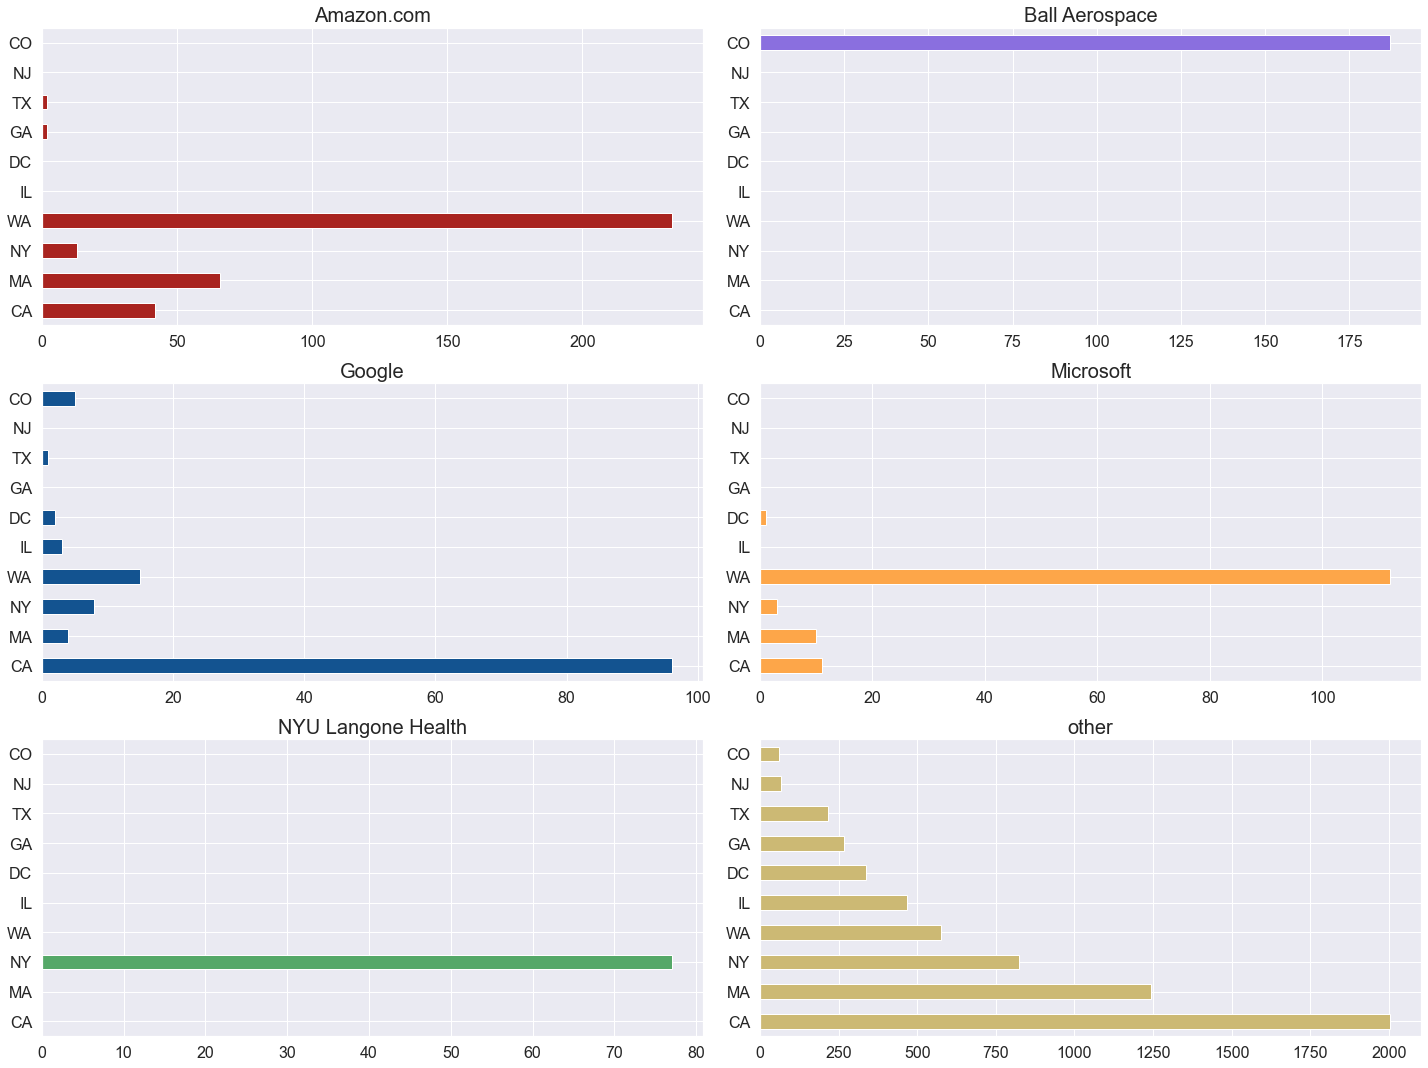

In [77]:
c_table = pd.crosstab(data2['state'], data2['company'])
c_table.sort_values(by='other', ascending=False, inplace=True)
fig, axs = plt.subplots(3,2, figsize=(20,15))
axs = axs.flatten()
colors = ['#A92420','#8A6FDF','#135390','#FDA649', 'g', 'y']
for col, ax, color in zip(c_table.columns, axs, colors):
    c_table[col].plot(kind='barh', xlabel='', rot=0, color=color, ax=ax, fontsize = 16)
    ax.set_title(col, size = 20)
    # ax.set_ylabel(size = 16)
plt.tight_layout()

In [188]:
data2 = data[['company', 'reviews']].copy()
data2.loc[~data2['company'].isin(top5_companies.index), 'company'] = 'other'
data2.dropna(subset=['reviews'], inplace=True)
# data3 = data2[data2['company'] != 'other']

In [189]:
data2.groupby('company').agg(['mean', 'std', 'max', 'min', 'median'])

reviews                                         
                            mean          std       max      min   median
company                                                                  
Amazon.com          25899.997199     4.856652   25907.0  25883.0  25902.0
Ball Aerospace        108.000000     0.000000     108.0    108.0    108.0
Google               2473.791045     0.408088    2474.0   2473.0   2474.0
Microsoft            4617.613139     1.183515    4618.0   4611.0   4618.0
NYU Langone Health    705.000000     0.000000     705.0    705.0    705.0
other                1498.907103  6383.616734  148114.0      2.0    152.0

# Location field analysis

<AxesSubplot:>

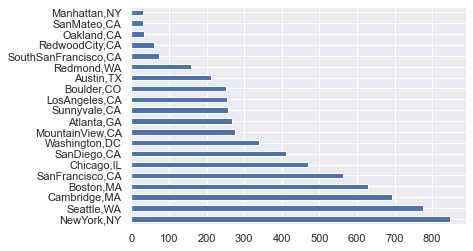

In [193]:
data['location'].value_counts().head(20).plot(kind='barh')

<AxesSubplot:>

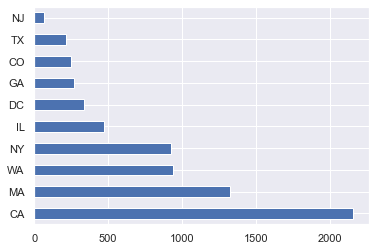

In [194]:
data['state'].value_counts().plot(kind='barh')

<AxesSubplot:xlabel='position', ylabel='location'>

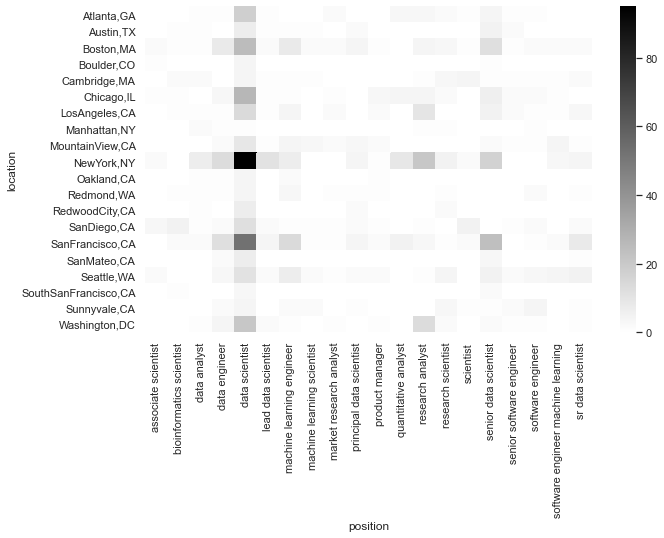

In [196]:
top20_positions = data['position'].value_counts().head(20).index
top20_locations = data['location'].value_counts().head(20).index
data2 = data[data['position'].isin(top20_positions) & data['location'].isin(top20_locations)]
pivot_table = pd.crosstab(data2['position'], data2['location'])
plt.subplots(figsize=(10,6))
sns.heatmap(pivot_table.T , cmap='binary')

<AxesSubplot:xlabel='state', ylabel='position'>

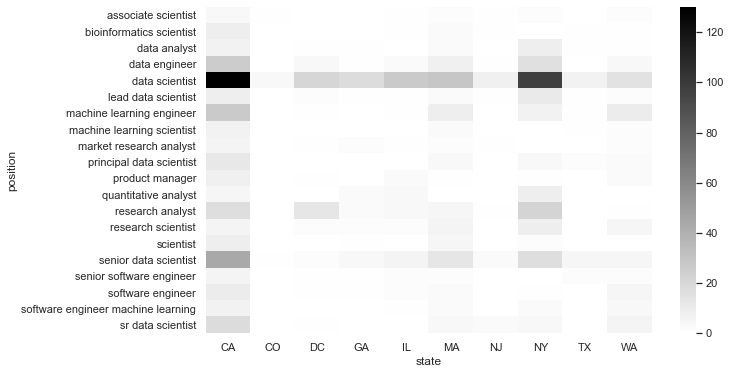

In [198]:
top20_positions = data['position'].value_counts().head(20).index
data2 = data[data['position'].isin(top20_positions)]
pivot_table = pd.crosstab(data2['position'], data2['state'])
plt.subplots(figsize=(10,6))
sns.heatmap(pivot_table , cmap='binary')

# Description field analysis

In [102]:
data2 = data.copy()

In [103]:
data2['description'] = data2['description'].apply(clean_position)

In [104]:
# Since the list is much shorter than the list of tokenize descriptions we want checking of word in tokenize description to be O(1)
# Not a perfect list but will do and handle most used tokens
bachelor_list = ['bs','b.s','bsc','bs/ms','bachelor','ba/bs','b.s.','bs/ms/phd','bachelors','ba','bs/ba','undergraduate']
master_list = ['masters','master','bs/ms','m.s.','m.s','msc','bs/ms/phd','ms','md/phd','ms/phd','postgraduate']
phd_list = ['phd','ph.d.','ph.d','bs/ms/phd','md/phd','ms/phd','doctoral','postgraduate','doctorate']

In [109]:
sentences = []
sent_word_sets = []
for row in data2.iterrows():
    desc = row[1]['description']
    word_tokens = word_tokenize(desc)
    sentences.append(word_tokens)
    sent_word_sets.append(set(word_tokens))

In [111]:
data2["sent_word_sets"] = sent_word_sets

In [106]:
def has_qual(word_set,qual_list):
    for word in qual_list:
        if word in word_set: #we want this part to be o(1) since qual_list is much shorter than word_set
            return True
    return False

In [112]:
data2["bachelors"] = data2["sent_word_sets"].apply(lambda x: has_qual(x,bachelor_list))
data2["masters"] = data2["sent_word_sets"].apply(lambda x: has_qual(x,master_list))
data2["phd"] = data2["sent_word_sets"].apply(lambda x: has_qual(x,phd_list))

In [114]:
print("Number of jobs with descriptions have bachelor:",data2["bachelors"].sum())
print("Number of jobs with descriptions have masters:",data2["masters"].sum())
print("Number of jobs with descriptions have phd:",data2["phd"].sum())

Number of jobs with descriptions have bachelor: 3209
Number of jobs with descriptions have masters: 3138
Number of jobs with descriptions have phd: 1900


## skills

In [64]:
data2 = data.copy()

In [65]:
skills = ['R','Python', 'Perl', 'Hadoop','SQL','Tableau','TensorFlow','Agile','Power BI','SSaS', 'STATA', 'Algorithm','Java','Visualization']
python_packages = ['tensorflow', 'numpy', 'pandas', 'sklearn', 'nltk', 'spacy']

In [66]:
data2['description'] = data2['description'].apply(clean_description)
# data2['description'] = data2['description'].apply(clean_description2)

In [184]:
for skill in skills:
    data2[skill] = data2['description'].str.contains(skill)

In [193]:
for pkg in python_packages:
    data2[pkg] = data2['description'].str.contains(pkg)

In [185]:
skill_df_list = []
for skill in skills:
    skill_df_list.append(data2[skill].value_counts()/data2.shape[0]*100)

In [194]:
pkg_df_list = []
for pkg in python_packages:
    pkg_df_list.append(data2[pkg].value_counts()/data2.shape[0]*100)

In [186]:
skills_df = pd.concat(skill_df_list, axis=1)
skills_df = skills_df.T

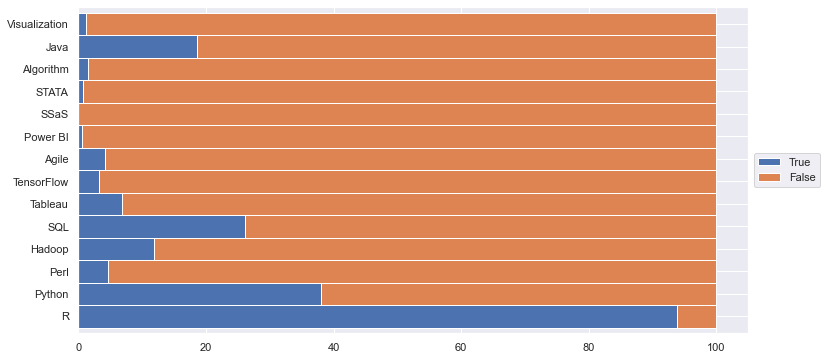

In [188]:
fig, ax = plt.subplots()
skills_df.plot(kind='barh', stacked=True, figsize=(12,6), width=1, ax=ax)
ax.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

In [210]:
pkgs_df[True]

tensorflow    5.479649
numpy         1.941608
pandas        2.516899
sklearn       0.215734
nltk          0.431468
spacy         0.230116
Name: True, dtype: float64

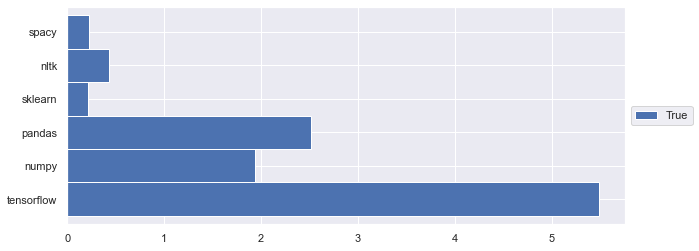

In [216]:
pkgs_df = pd.concat(pkg_df_list, axis=1)
pkgs_df = pkgs_df.loc[True]
fig, ax = plt.subplots()
pkgs_df.plot(kind='barh', stacked=True, figsize=(10,4), width=1, ax=ax)
ax.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

In [225]:
data2['description'][0]

'development director als therapy development institute has an immediate opening for development directors reporting directly to the senior development director the development director at als tdi is a senior fundraising position working to identifying potential prospects and cultivating solicitation strategies and in closing asks with donors including individuals and corporations by building networks via events generating awareness of als tdi outreach including attending and speaking at events as well as personally cultivates relationships with patients prospects and donors this position will be responsible for generating and managing a portfolio of at least two million to five million dollars per year this position will be located in atlanta ga requirements bachelor degree requiredminimum years experience in fundraising and business developmentsuccessful track recording in fundraising with major donors or scientific sales preferreddemonstrated ability to work independently and make p

In [69]:
# Print out the first 5 examples of matches
limit = 0
for corpus in data2['description']:
    if not 'experience' in corpus: continue
    year = re.findall("\d{1,2}\+? year", corpus)
    if len(year)==1:
        print(year[0])
        limit +=1
    if limit >= 5:
        break

2 year
2 year
1 year
1 year
1 year


In [89]:
# Compile the year value found into a list
experience_req = []
for corpus in data2['description']:
    if not 'experience' in corpus: continue
    year = re.findall("\d{1,2}\+? year", corpus)
    if len(year)==1:
        year = year[0].replace('year','')
        experience_req.append(year)
        
counted_list = Counter(experience_req)

In [116]:
year_df = pd.DataFrame(counted_list.items(), columns=['year of experience', 'frequency'])

In [119]:
year_df = year_df.astype({'year of experience': 'int32'})

In [118]:
year_df.sort_values('year of experience', inplace=True)

In [120]:
year_df

,year of experience,frequency
5,0,2
9,0,13
1,1,85
0,2,226
2,3,226
8,4,94
3,5,317
12,6,60
4,7,53
6,8,63


In [122]:
year_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38 entries, 5 to 27
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   year of experience  38 non-null     int32
 1   frequency           38 non-null     int64
dtypes: int32(1), int64(1)
memory usage: 760.0 bytes


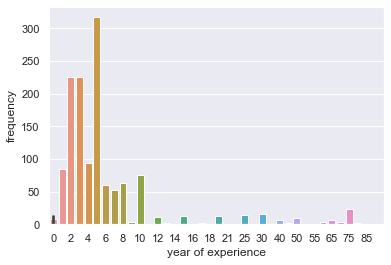

In [137]:
fig, ax = plt.subplots()
sns.barplot(data=year_df, x='year of experience', y='frequency', ax=ax);
ax.set_xticks(np.arange(0,40,2));

# Machine Learning

In [115]:
from nltk.stem import PorterStemmer

import sklearn
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict

from sklearn.metrics import accuracy_score,confusion_matrix, precision_score, recall_score, roc_curve

from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import MultinomialNB

In [63]:
data2 = data.copy()

In [65]:
top5_companies = data2['company'].value_counts().head(5)
data2.loc[~data2['company'].isin(top5_companies.index), 'company'] = 'other'

In [66]:
data2.company.value_counts()

other                 6060
Amazon.com             358
Ball Aerospace         187
Microsoft              137
Google                 134
NYU Langone Health      77
Name: company, dtype: int64

In [56]:
# def foo(x):
#     if x == 'Amazon.com':
#         return x
#     else:
#         return 'Other'

# data2['company'] = data2['company'].apply(foo)

In [93]:
X, Y =data2['description'], data2['company']

In [94]:
X = [re.sub(r"[^a-zA-Z0-9]+", ' ', k) for k in X]
X = [re.sub("[0-9]+",' ',k) for k in X]

ps = PorterStemmer()
X = [ps.stem(k) for k in X]

In [95]:
tfidf=TfidfVectorizer()
# label_enc=LabelEncoder()
onehot = OneHotEncoder()

X = tfidf.fit_transform(X)
Y_label =label_enc.fit_transform(Y)
# Y_hot = onehot.fit_transform(Y.to_numpy().reshape(-1,1))

In [89]:
X

<6953x36034 sparse matrix of type '<class 'numpy.float64'>'
	with 1943659 stored elements in Compressed Sparse Row format>

In [96]:
x_train, x_test, y_train, y_test = train_test_split(X,Y_label,stratify=Y_label,test_size=0.3)
# x_train, x_test, y_train, y_test = train_test_split(X,Y_hot,stratify=Y_hot,test_size=0.3)

In [98]:
y_test

array([5, 0, 5, ..., 5, 5, 5])

In [99]:
pd.DataFrame(y_test).value_counts()

5    1818
0     108
1      56
3      41
2      40
4      23
dtype: int64

In [111]:
sgd=SGDClassifier()
sgd.fit(x_train,y_train)
y_train_pred = cross_val_predict(sgd, x_train, y_train, cv=3)
y_pred = cross_val_predict(sgd, x_test, y_test, cv=3)


print('Accuracy of SGD :', accuracy_score(y_test,y_pred))
print ('Confusion Matrix of SGD : ', '\n', confusion_matrix(y_test,y_pred))

Accuracy of SGD : 0.9779482262703739
Confusion Matrix of SGD :  
 [[  79    0    0    0    0   29]
 [   0   56    0    0    0    0]
 [   0    0   40    0    0    0]
 [   0    0    0   37    0    4]
 [   0    0    0    0   23    0]
 [  12    0    1    0    0 1805]]


In [112]:
cross_val_score(sgd, x_train, y_train, cv=5, scoring="accuracy")

array([0.98665298, 0.98459959, 0.98972251, 0.98663926, 0.99177801])

In [113]:
cross_val_score(sgd, x_test, y_test, cv=5, scoring="accuracy")

array([0.97607656, 0.98321343, 0.98321343, 0.98561151, 0.98321343])

In [104]:
precision = precision_score(y_train, y_train_pred,average='micro')
recall = recall_score(y_train, y_train_pred,average='micro')
print(precision, recall)

0.9938360386274913 0.9938360386274913


In [119]:
y_scores = sgd.decision_function(x_test[6])
y_scores

array([[-1.37022984, -1.34890433,  1.35765183, -1.14156884, -1.45566102,
        -1.52960685]])

In [126]:
x_test.toarray().shape

(2086, 36034)

In [122]:
pd.DataFrame(x_test[6].toarray())

,0,1,2,3,4,5,6,7,8,9,...,36024,36025,36026,36027,36028,36029,36030,36031,36032,36033
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:


fpr, tpr, thresholds = roc_curve(y_train, y_scores)